In [1]:
from finml_utils import get_env

In [2]:
from analysis.backtest import backtest_portfolio
from analysis.plot import plot_backtest_results
from analysis.price import get_multiple_price_series, get_price_series
from analysis.utils import rebase
from api import get_portfolio_historical_weights

In [3]:
UNRAVEL_API_KEY = get_env("UNRAVEL_API_KEY")
portfolio = "beta.5"
start_date = "2022-01-01"
end_date = "2024-06-01"
benchmark_ticker = "BTC"

In [4]:
portfolio_historical_weights = get_portfolio_historical_weights(
    portfolio,
    UNRAVEL_API_KEY,
    start_date,
    end_date,
    smoothing=None,  # This will use the default smoothing please see catalog for default values for each portfolio (https://unravel.finance/home/api/catalog/portfolios)
)

In [5]:
underlying = get_multiple_price_series(
    portfolio_historical_weights.columns, start_date, end_date
)

In [6]:
if benchmark_ticker in underlying.columns:
    benchmark = underlying[benchmark_ticker]
else:
    benchmark = get_price_series(
        benchmark_ticker,
        start_date,
        end_date,
    )

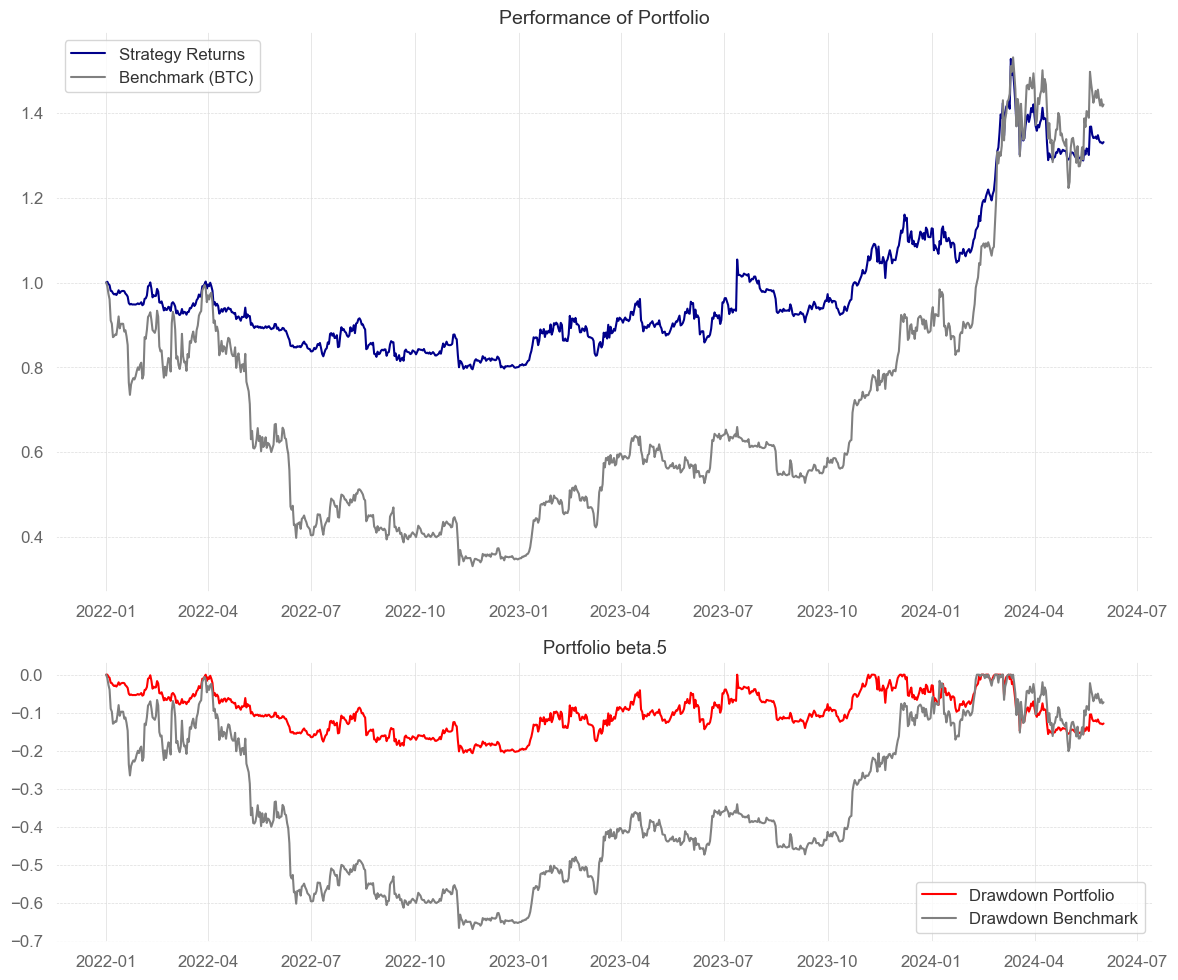

(<Figure size 1200x1000 with 2 Axes>,
 (<Axes: title={'center': 'Performance of Portfolio'}>,
  <Axes: title={'center': 'Portfolio beta.5'}>))

In [7]:
underlying_returns = underlying.pct_change()
portfolio_returns, _ = backtest_portfolio(
    weights=portfolio_historical_weights,
    underlying=underlying_returns,
    transaction_cost=0.001,
    lag=0,
)
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod()
plot_backtest_results(
    rebase(portfolio_cumulative_returns), rebase(benchmark), portfolio
)